In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = pd.read_csv('spotify_churn_dataset.csv')
ds.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [4]:
ds.shape

(8000, 12)

In [5]:
ds.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [6]:
#Finding the missing values.
ds.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [7]:
#checking for the numerical and categorical data.
numerical_data = ds.select_dtypes(include = ['number'])
categorical_data = ds.select_dtypes(exclude = ['number'])
print('Numerical columns: \n')
display(numerical_data.head())
print('\nCategorical columns:')
display(categorical_data.head())

Numerical columns: 



,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
0,1,54,26,23,0.20,31,0,1
1,2,33,141,62,0.34,0,1,0
2,3,38,199,38,0.04,0,1,1
3,4,22,36,2,0.31,0,1,0
4,5,29,250,57,0.36,0,1,1



Categorical columns:


,gender,country,subscription_type,device_type
0,Female,CA,Free,Desktop
1,Other,DE,Family,Web
2,Male,AU,Premium,Mobile
3,Female,CA,Student,Mobile
4,Other,US,Family,Mobile


<Axes: >

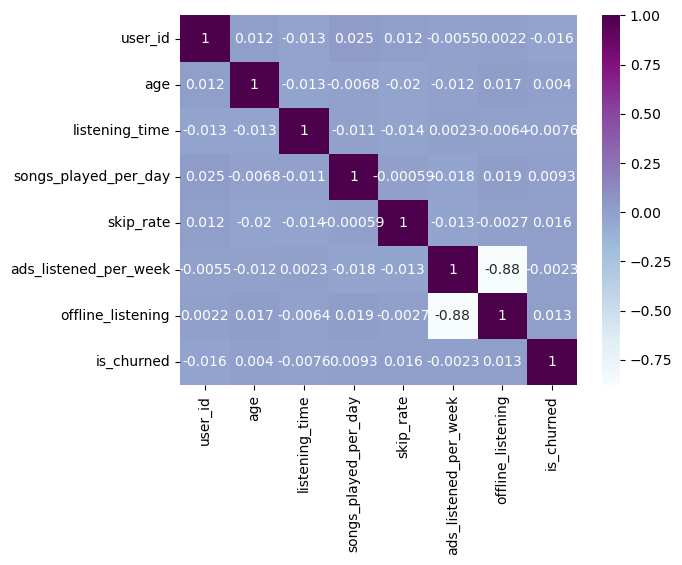

In [8]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='BuPu')

In [10]:
#Checking for duplicates
Data_duplicates = ds.duplicated()
Data_duplicates.sum()

np.int64(0)

In [11]:
#Finidng Outliers.
ds['z_score'] = stats.zscore(ds['is_churned'])
ds.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1,1.692001
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0,-0.591016
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1,1.692001
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0,-0.591016
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1,1.692001


In [12]:
outliers = ds[(ds['z_score'] > 3) | (ds['z_score'] < -3)]
outliers

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score


In [13]:
!pip install ydata_profiling --quiet

In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(ds, title= 'Pandas Profiling Report for Spotify Churn Data')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:01<00:00, 12.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
import joblib
for i in categorical_data.columns:
  encoder = LabelEncoder()
  ds[i] = encoder.fit_transform(ds[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

ds.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
0,1,0,54,1,1,26,23,0.20,0,31,0,1,1.692001
1,2,2,33,2,0,141,62,0.34,2,0,1,0,-0.591016
2,3,1,38,0,2,199,38,0.04,1,0,1,1,1.692001
3,4,0,22,1,3,36,2,0.31,1,0,1,0,-0.591016
4,5,2,29,7,0,250,57,0.36,1,0,1,1,1.692001


In [16]:
ds.loc[ds[('is_churned')] == 0]

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
1,2,2,33,2,0,141,62,0.34,2,0,1,0,-0.591016
3,4,0,22,1,3,36,2,0.31,1,0,1,0,-0.591016
5,6,0,17,0,1,219,35,0.46,0,13,0,0,-0.591016
6,7,0,39,6,2,289,44,0.38,0,0,1,0,-0.591016
7,8,0,41,6,1,210,68,0.11,1,5,0,0,-0.591016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,7995,1,34,5,0,21,77,0.56,0,0,1,0,-0.591016
7996,7997,1,34,0,2,61,64,0.59,1,0,1,0,-0.591016
7997,7998,0,17,7,1,81,62,0.33,0,5,0,0,-0.591016
7998,7999,0,34,4,3,245,94,0.27,0,0,1,0,-0.591016


In [17]:
ds.loc[ds[('is_churned')] == 1]

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
0,1,0,54,1,1,26,23,0.20,0,31,0,1,1.692001
2,3,1,38,0,2,199,38,0.04,1,0,1,1,1.692001
4,5,2,29,7,0,250,57,0.36,1,0,1,1,1.692001
11,12,2,24,1,1,113,24,0.56,0,39,0,1,1.692001
14,15,2,37,4,0,114,13,0.44,2,0,1,1,1.692001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,7982,0,44,3,0,253,41,0.33,0,0,1,1,1.692001
7982,7983,1,57,0,2,176,77,0.43,2,0,1,1,1.692001
7984,7985,2,16,5,2,277,76,0.02,0,0,1,1,1.692001
7988,7989,1,41,4,3,137,74,0.53,0,0,1,1,1.692001


In [18]:
#Scaling the dataset because of the high std in the user_id column
from sklearn.preprocessing import StandardScaler

for i in ds.drop(['is_churned'],  axis=1).columns:
  if ds[i].std() > 1000:
    scaler = StandardScaler()
    ds[i] = scaler.fit_transform(ds[[i]])

ds.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
0,-1.731834,0,54,1,1,26,23,0.20,0,31,0,1,1.692001
1,-1.731401,2,33,2,0,141,62,0.34,2,0,1,0,-0.591016
2,-1.730968,1,38,0,2,199,38,0.04,1,0,1,1,1.692001
3,-1.730535,0,22,1,3,36,2,0.31,1,0,1,0,-0.591016
4,-1.730102,2,29,7,0,250,57,0.36,1,0,1,1,1.692001


In [53]:
ds.describe()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,z_score
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,0.000000,0.998875,37.662125,3.501250,1.515625,154.068250,50.127250,0.300127,0.980625,6.943875,0.747750,0.258875,2.042810e-17
std,1.000063,0.814682,12.740359,2.300687,1.103022,84.015596,28.449762,0.173594,0.821483,13.617953,0.434331,0.438044,1.000063e+00
min,-1.731834,0.000000,16.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.910161e-01
25%,-0.865917,0.000000,26.000000,2.000000,1.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000,0.000000,-5.910161e-01
50%,0.000000,1.000000,38.000000,4.000000,2.000000,154.000000,50.000000,0.300000,1.000000,0.000000,1.000000,0.000000,-5.910161e-01
75%,0.865917,2.000000,49.000000,5.000000,2.000000,227.000000,75.000000,0.450000,2.000000,5.000000,1.000000,1.000000,1.692001e+00
max,1.731834,2.000000,59.000000,7.000000,3.000000,299.000000,99.000000,0.600000,2.000000,49.000000,1.000000,1.000000,1.692001e+00


In [19]:
from sklearn.model_selection import train_test_split

x = ds.drop('is_churned', axis=1)
y = ds.is_churned

xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state=40)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytrain:{ytrain.shape}')
print(f'Ytest: {ytest.shape}')

xtrain: (6400, 12)
xtest: (1600, 12)
ytrain:(6400,)
Ytest: (1600,)


In [20]:
#introducing the model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)

LogisticRegression()

In [21]:
#Evaluate using the Xtrain
prediction = logmodel.predict(xtrain)
r2_score(ytrain, prediction)

1.0

In [22]:
#Evaluate using the ytest
prediction = logmodel.predict(xtest)
r2_score(ytest, prediction)

1.0

In [48]:
import joblib

joblib.dump(logmodel, 'spotify_churn_model.joblib')


['spotify_churn_model.joblib']

In [1]:
import joblib
model = joblib.load('spotify_churn_model.joblib')
print(model.feature_names_in_)


['user_id' 'gender' 'age' 'country' 'subscription_type' 'listening_time'
 'songs_played_per_day' 'skip_rate' 'device_type' 'ads_listened_per_week'
 'offline_listening' 'z_score']


In [23]:
#Feature Selection
x = ds.drop('is_churned', axis = 1)
y = ds.is_churned

In [24]:
from sklearn.metrics import classification_report
prediction = logmodel.predict(xtrain)
print(classification_report(ytrain, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4745
           1       1.00      1.00      1.00      1655

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



In [25]:
from sklearn.metrics import classification_report
prediction = logmodel.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       416

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [6]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')


In [26]:
#Finding the coefficients
coefficients = pd.DataFrame({'Feature': xtest.columns,'Coefficient': logmodel.coef_[0]}).sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
11,z_score,6.130030
0,user_id,0.006565
5,listening_time,-0.001705
6,songs_played_per_day,-0.004013
2,age,-0.015512
9,ads_listened_per_week,-0.026476
3,country,-0.036905
8,device_type,-0.139913
4,subscription_type,-0.155347
1,gender,-0.160932


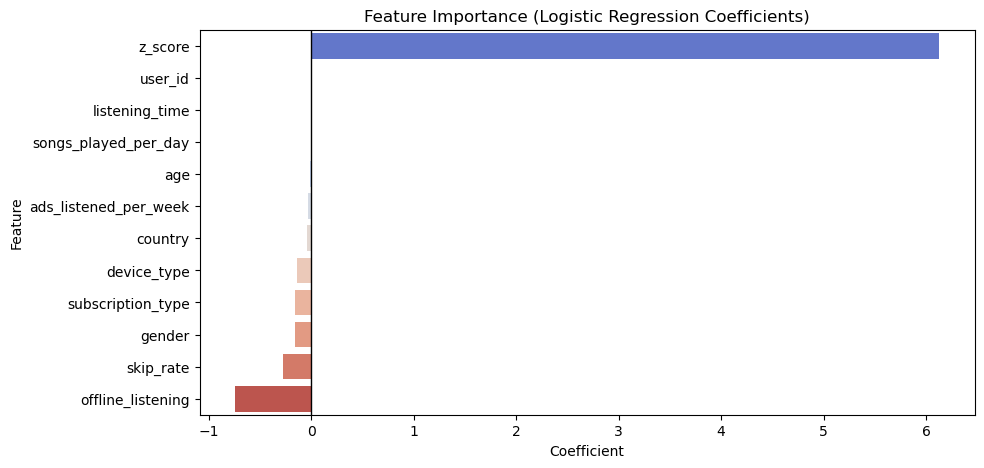

In [27]:
# Visualize feature importance
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(0, color='black', linewidth=1)
plt.show()

In [28]:
# CREATE THE CRITICAL CHURN RISK INDEX (CCRI)
# Select key features and their weights (from model coefficients)
#Features includes: offline listening, skip rate, subsciption type, ads listened per week
Key_Features = ['skip_rate','listening_time', 'offline_listening', 'subscription_type', 'ads_listened_per_week']
Weights = {feat: coefficients.loc[coefficients['Feature'] == feat, 'Coefficient'].values[0] for feat in Key_Features}

In [29]:
# Normalize the key features
for col in Key_Features:
    xtest[f'{col}_norm'] = (xtest[col] - xtest[col].min()) / (xtest[col].max() - xtest[col].min())

In [30]:
# Compute critical churn index CCRI
xtest['CCRI'] = (
    Weights['skip_rate'] * xtest['skip_rate_norm'] +
    Weights['ads_listened_per_week'] * xtest['ads_listened_per_week_norm'] +
    Weights['listening_time'] * xtest['listening_time_norm'] +
    Weights['offline_listening'] * xtest['offline_listening_norm'] +
    Weights['subscription_type'] * xtest['subscription_type_norm']
)

In [42]:
xtest.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,z_score,skip_rate_norm,listening_time_norm,offline_listening_norm,subscription_type_norm,ads_listened_per_week_norm,CCRI,is_churned
5324,0.573525,1,57,5,1,266,19,0.36,2,35,0,-0.591016,0.600000,0.885813,0.0,0.333333,0.714286,-0.236573,0
7392,1.468996,2,38,2,2,31,20,0.48,2,0,1,-0.591016,0.800000,0.072664,1.0,0.666667,0.000000,-1.068337,0
6146,0.929462,0,32,7,0,284,39,0.44,1,0,1,1.692001,0.733333,0.948097,1.0,0.000000,0.000000,-0.948001,1
2242,-0.761020,0,25,4,1,19,52,0.35,0,17,0,-0.591016,0.583333,0.031142,0.0,0.333333,0.346939,-0.220825,0
4100,0.043518,2,19,4,2,63,61,0.10,0,0,1,-0.591016,0.166667,0.183391,1.0,0.666667,0.000000,-0.895025,0


In [45]:
# Combine xtest and ytest for risk analysis
risk_analysis = xtest.copy()
risk_analysis['is_churned'] = ytest

# Define thresholds for risk levels based on CCRI (example: using quantiles)
# Higher CCRI values indicate higher churn risk
threshold_high = risk_analysis['CCRI'].quantile(0.75) # Top 25% of CCRI values
threshold_low = risk_analysis['CCRI'].quantile(0.25)  # Bottom 25% of CCRI values

# Assign risk levels
risk_analysis['risk_level'] = 'Medium Risk'
risk_analysis.loc[risk_analysis['CCRI'] >= threshold_high, 'risk_level'] = 'High Risk'
risk_analysis.loc[risk_analysis['CCRI'] <= threshold_low, 'risk_level'] = 'Low Risk'

# Set the threshold for visualization to the high-risk threshold
threshold = threshold_high

# Compare churn rates by risk group
risk_summary = risk_analysis.groupby('risk_level')['is_churned'].mean().reset_index()

print("Churn rate by risk group:")
print(risk_summary)

Churn rate by risk group:
    risk_level  is_churned
0    High Risk     0.24500
1     Low Risk     0.27250
2  Medium Risk     0.26125


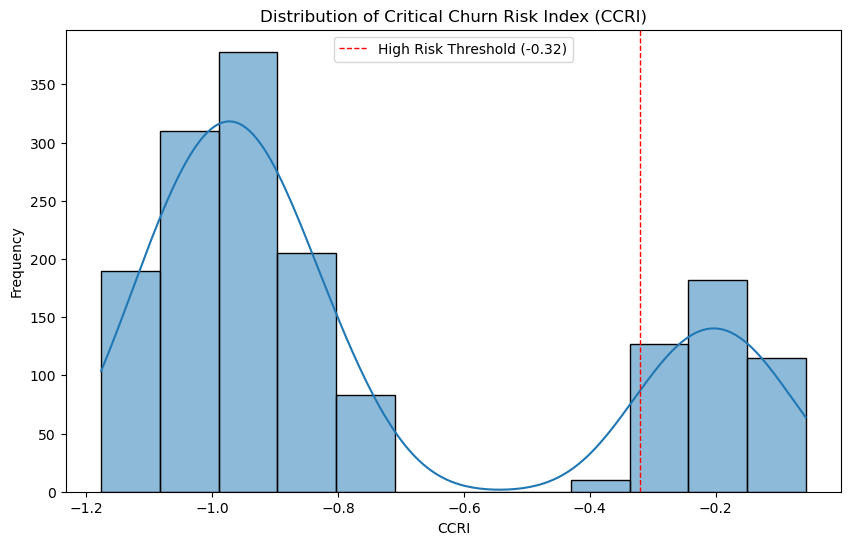

In [46]:
# Visualize the distribution of CCRI
plt.figure(figsize=(10, 6))
sns.histplot(xtest['CCRI'], kde=True)
plt.title('Distribution of Critical Churn Risk Index (CCRI)')
plt.xlabel('CCRI')
plt.ylabel('Frequency')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1, label=f'High Risk Threshold ({threshold:.2f})')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       416

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


AUC-ROC Score: 1.0


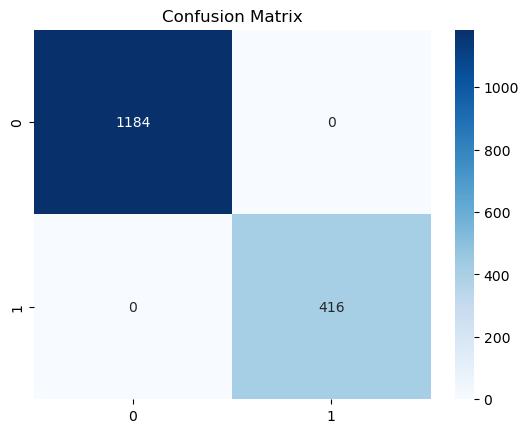

In [47]:
# Model metrics
print("\nClassification Report:")
# We need predictions based on the model using the original xtest features
y_pred = logmodel.predict(xtest[x.columns])
print(classification_report(ytest, y_pred))

print("\nAUC-ROC Score:", roc_auc_score(ytest, logmodel.predict_proba(xtest[x.columns])[:, 1]))

# Confusion matrix visualization
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()